# Project: No-show appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The dataset I have chose to investigate is about medical appointments, This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment and a number of characteristics about the patient are included in each row.

**The questions to be answered:**

- How many females and males, and How many showed and no?
- what is the correlation between showing in the appointment and Neighbourhood?
- what is the correlation between showing in the appointment and the age of the patient?
- what is the correlation between showing in the appointment and Handicap?
- what is the correlation between showing in the appointment and Weekdays?
- what is the correlation between showing up or not with the Sms received?


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
# Data Wrangling




### First let's check a sample of the dataset

In [29]:
## Loading the data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [30]:
## showing dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**As we see here before we have 110527 rows (patient records) and 14 columns with different data types and there is no null entries, lets check again**



In [31]:
## Checking again number of rows and columns
df.shape

(110527, 14)


>Check for duplicate entries

In [32]:
df.duplicated().sum()

0

### checking dataframe for Data cleaning

In [33]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As we see there is wrong entries as in Age with -1 



# Data Cleaning (Replace this with more specific notes!)

### First I will drop PatientId and AppointmentID because I will not use them 

In [34]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)


In [35]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Now I will change Columns Names to be more easy readable for me and other users

   

In [36]:
## changing columns names to lower cases
df.columns = df.columns.str.lower()

In [37]:
## Checking lower cases
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

In [38]:
## Changing columns names to more readable ones 

df.rename(columns = {'scheduledday' : 'scheduled_day', 'appointmentday': 'appointment_day', 'hipertension': 'hypertension', 'handcap':'handicap', 'no-show': 'showed'}, inplace = True)

In [39]:
## let's check again

df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [40]:
## changing value names to be more readable for me

df["showed"].replace({"No": "Yes", "Yes": "No"}, inplace=True)

In [41]:
## Checking...

df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes


### Now fixing the date format in 'scheduled_day' and 'appointment_day'

In [42]:
## Changing the date format

df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [43]:
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes


>### Now Checking Age 

In [44]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [45]:
# removing wrong age entry row
df.drop(df.query("age == -1").index,inplace=True)

In [46]:
## now check again

df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis


### Check data outliers and analysis

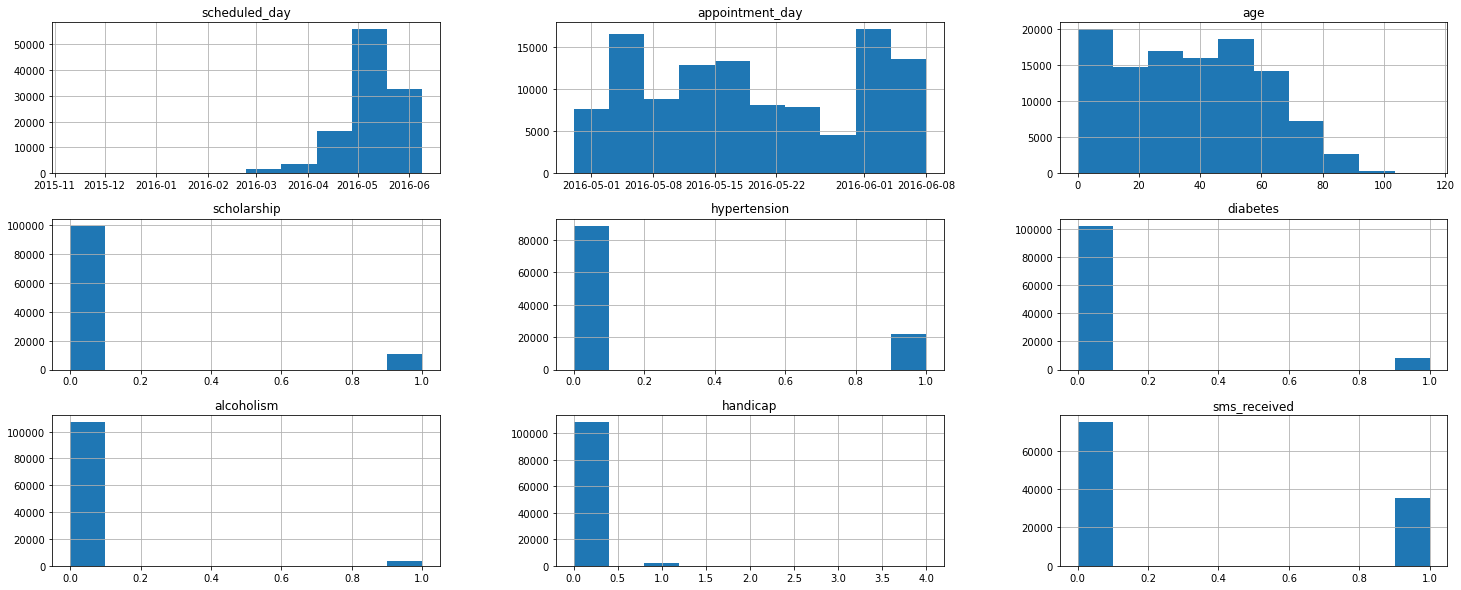

In [49]:
## Show dataframe histograms..

df.hist(figsize=(25,10));

### How many females and males, and How many showed and no?

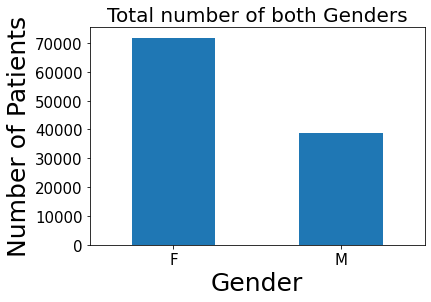

In [122]:
df.gender.value_counts().plot(kind = 'bar');
plt.title('Total number of both Genders', size = 20)
plt.xticks(rotation = 0, size = 15)
plt.yticks(size = 15)
plt.ylabel('Number of Patients', size=25)
plt.xlabel('Gender', size=25);

### Females are 71839
### Males are 38687

In [51]:
showed = df.showed == 'Yes'
not_showed = df.showed == 'No'


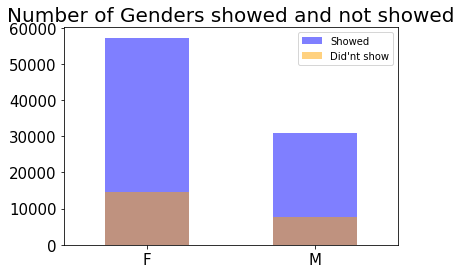

In [119]:
df.gender[showed].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Showed')
df.gender[not_showed].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='Did\'nt show')
plt.title('Number of Genders showed and not showed',size = 20)
plt.xticks(rotation = 0, size = 15)
plt.yticks(size = 15)
plt.legend();

### Females showed = 57245
### Males showed = 30962

## Showing correlation between showing in the appointment and Neighbourhood?

In [53]:
showed_df = df.query('showed == "Yes"')
not_showed_df = df.query('showed == "No"')

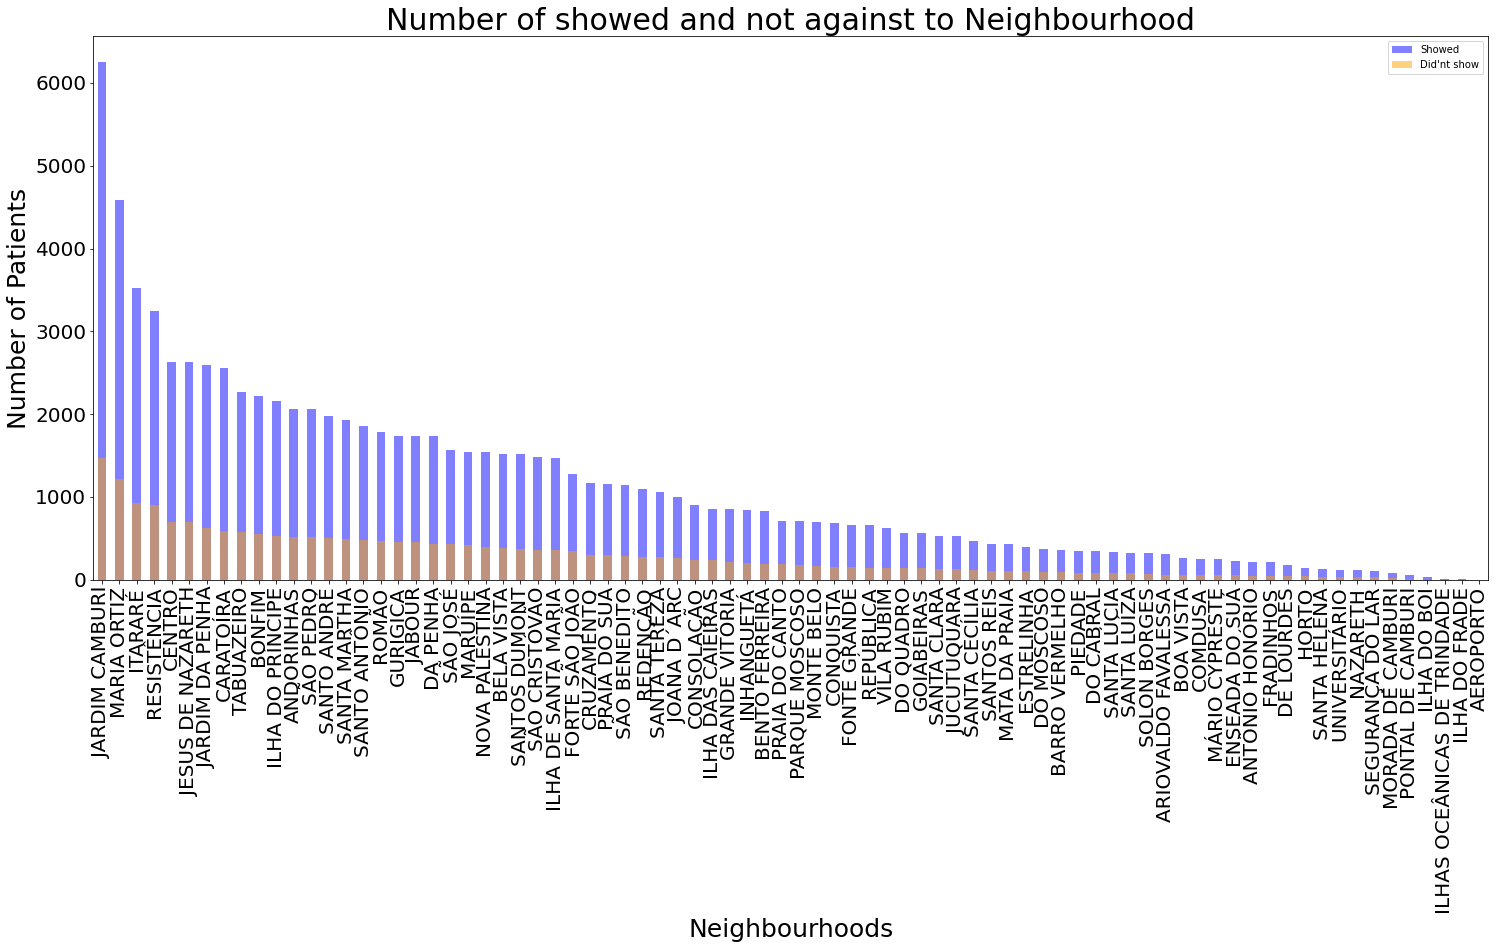

In [121]:
showed_df['neighbourhood'].value_counts().plot(kind = 'bar',figsize=(25,10), alpha=0.5, color= 'blue', label='Showed');
not_showed_df['neighbourhood'].value_counts().plot(kind = 'bar',figsize=(25,10), alpha=0.5, color= 'orange', label='Did\'nt show');
plt.title('Number of showed and not against to Neighbourhood',size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Number of Patients', size=25)
plt.xlabel('Neighbourhoods', size=25)
plt.legend();

## Showing correlation between showing in the appointment and the age of the patient?

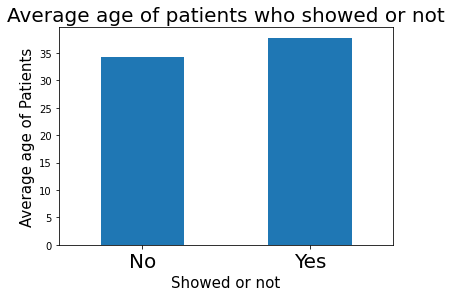

In [125]:
## Using a function to get average groupby selection..

def avg_group(data,index,by):
    return data.groupby(index)[by].mean()

avg_group(df,'showed','age').plot(kind = 'bar')
plt.xticks(rotation=0 , size = 20)
plt.ylabel('Average age of Patients', size=15)
plt.xlabel('Showed or not', size=15)
plt.title('Average age of patients who showed or not', size= 20);

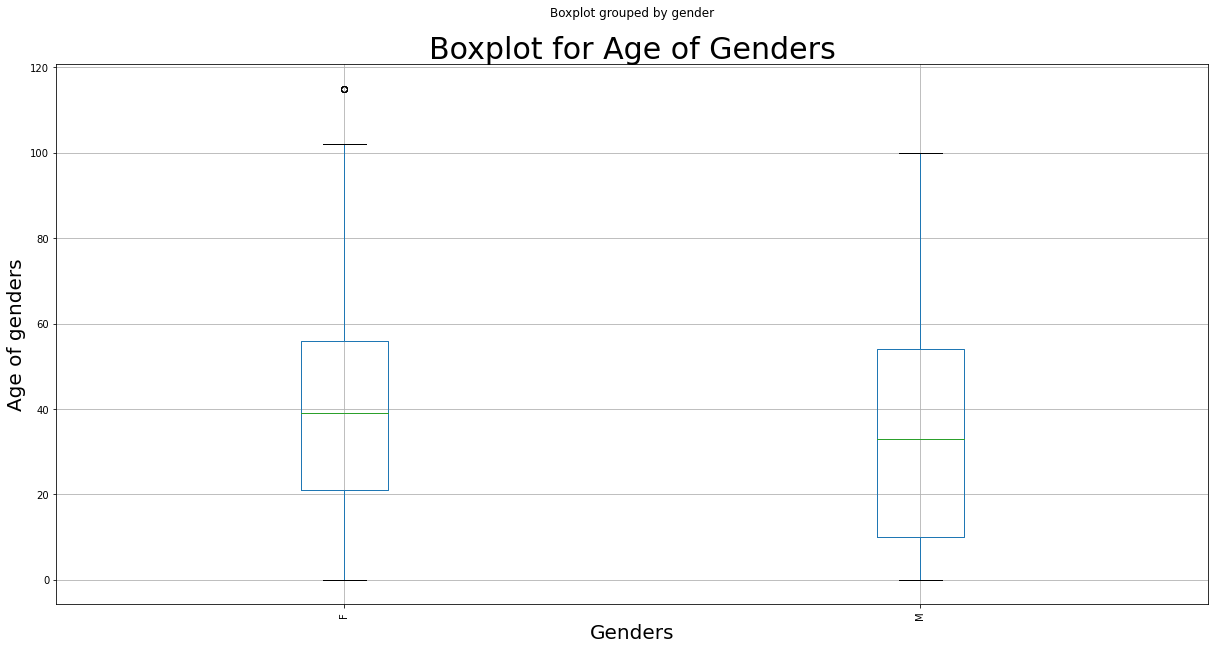

In [108]:
df.boxplot(column =['age'], by = ['gender'], rot = 90,figsize=(20,10) )
plt.ylabel('Age of genders',size = 20)
plt.xlabel('Genders',size = 20)
plt.title('Boxplot for Age of Genders', size= 30);

**As above in the boxplot we conclude that males have a wider range than females but average age of females are higher than males.\
Also females data has an outlier and the max age.**

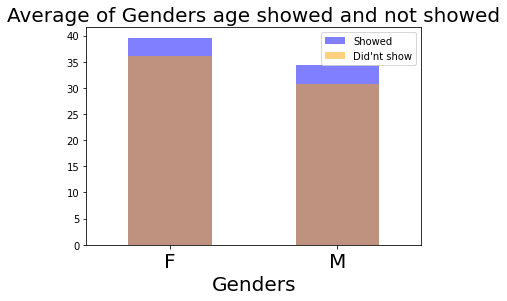

In [126]:
avg_group(showed_df,'gender','age').plot(kind = 'bar', alpha=0.5, color= 'blue', label='Showed');
avg_group(not_showed_df,'gender','age').plot(kind = 'bar', alpha=0.5, color= 'orange', label='Did\'nt show');
plt.title('Average of Genders age showed and not showed', size = 20)
plt.xticks(rotation=0 , size = 20)
plt.xlabel('Genders', size = 20)
plt.legend();

In [63]:
attended = df["showed"] == "Yes"
missed = df["showed"] == "No"

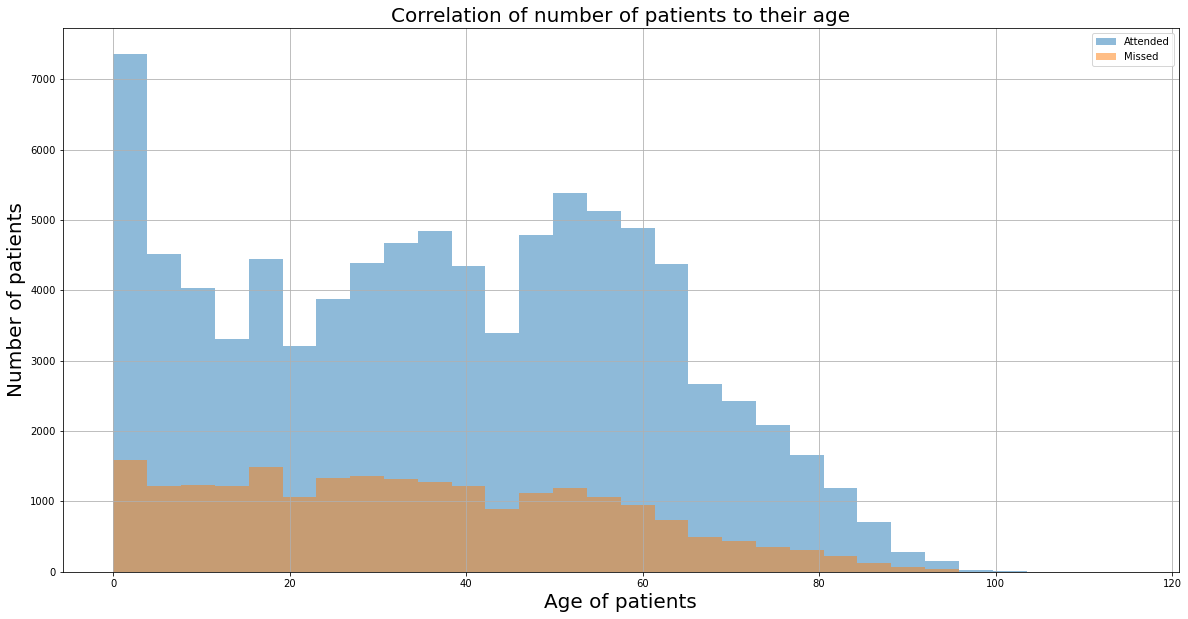

In [84]:
df.age[attended].hist(alpha=0.5, bins=30,label="Attended", figsize=(20,10))
df.age[missed].hist(alpha=0.5, bins=30,label="Missed", figsize=(20,10))
plt.xlabel('Age of patients', size = 20)
plt.ylabel('Number of patients', size = 20)
plt.title('Correlation of number of patients to their age', size = 20)
plt.legend();

## Showing correlation between showing in the appointment and Handicap?

handicap  showed
0         Yes       86373
          No        21912
1         Yes        1676
          No          366
2         Yes         146
          No           37
3         Yes          10
          No            3
4         Yes           2
          No            1
Name: showed, dtype: int64


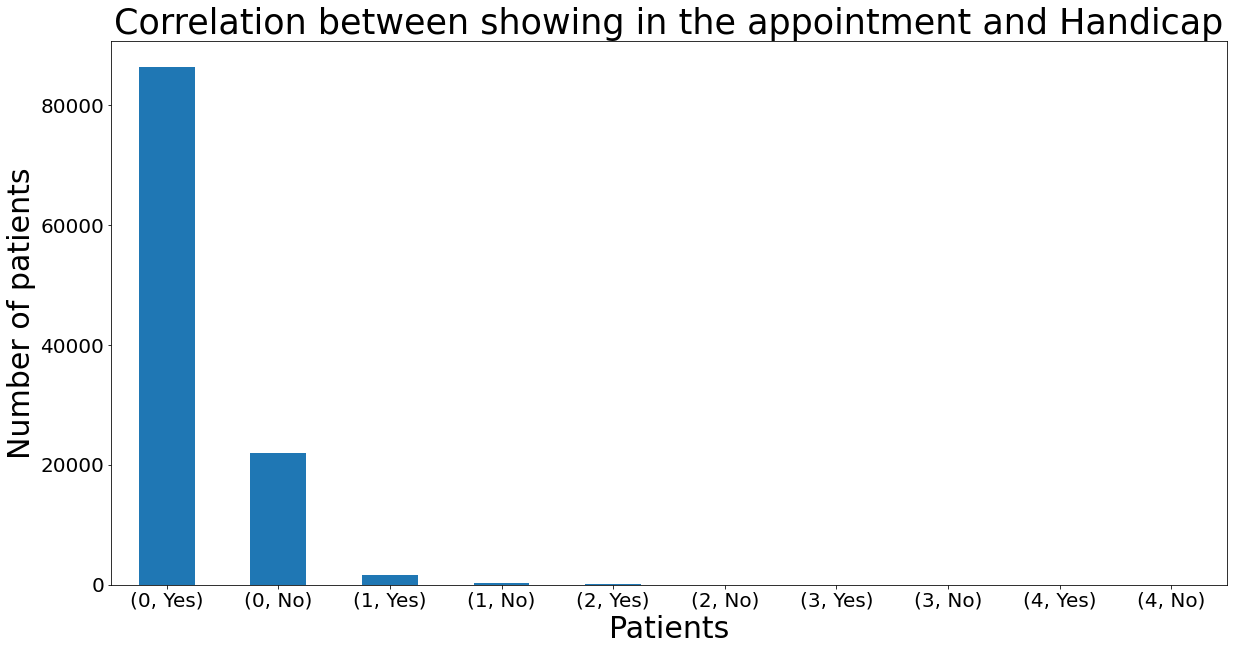

In [98]:
df.groupby('handicap')['showed'].value_counts().plot(kind = 'bar', figsize=(20,10));
plt.title('Correlation between showing in the appointment and Handicap', size = 35)
plt.xlabel('Patients', size = 30)
plt.ylabel('Number of patients', size = 30)
plt.xticks(rotation=0 , size = 20)
plt.yticks(size = 20)
print(df.groupby('handicap')['showed'].value_counts())

It seems that handicap is not the main reason for patients not to show up the appointments

## Showing correlation between showing in the appointment and Weekdays?

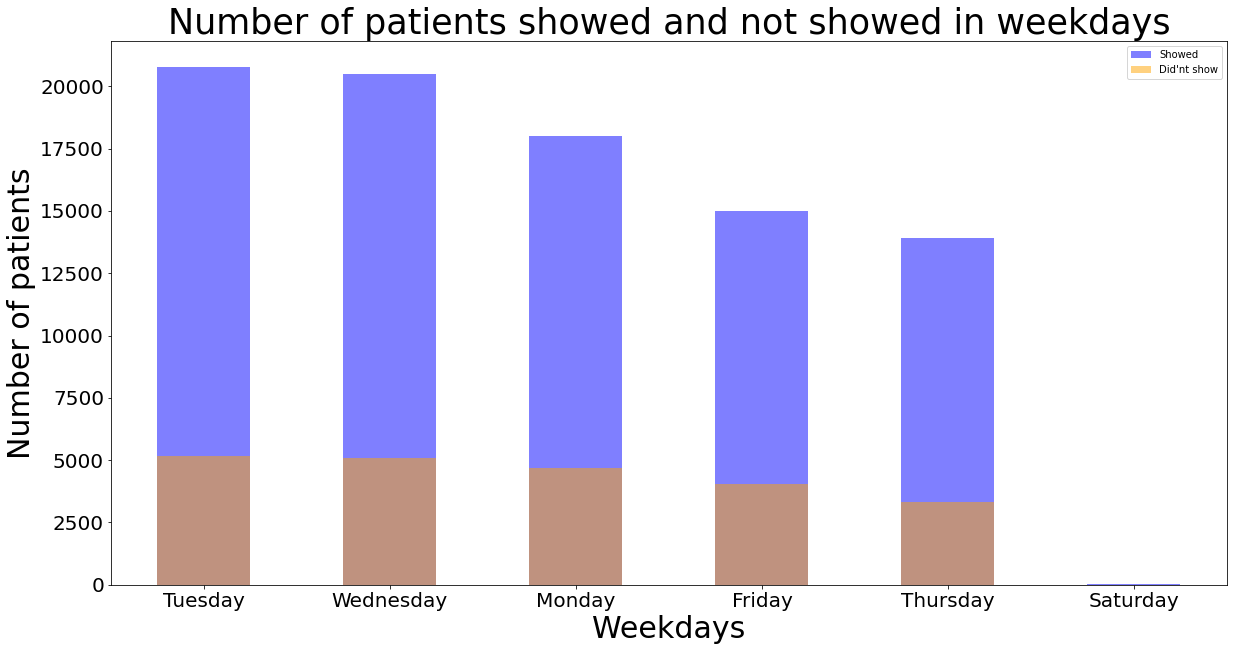

In [94]:
days_showed = showed_df['appointment_day'].dt.day_name().value_counts()
days_not = not_showed_df['appointment_day'].dt.day_name().value_counts()
days_showed.plot(kind='bar', alpha=0.5, color= 'blue', label='Showed',figsize=(20,10));
days_not.plot(kind= 'bar', alpha=0.5, color= 'orange', label='Did\'nt show',figsize=(20,10));
plt.title('Number of patients showed and not showed in weekdays', size = 35)
plt.xlabel('Weekdays', size = 30)
plt.ylabel('Number of patients', size = 30)
plt.xticks(rotation=0 , size = 20)
plt.yticks(size = 20)
plt.legend();

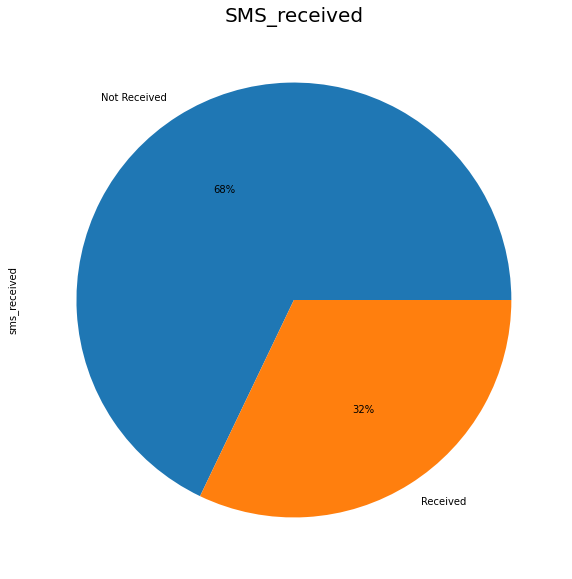

In [97]:
df["sms_received"].value_counts().plot(kind="pie",labels=["Not Received","Received"], autopct='%1.0f%%',figsize=(20,10))
plt.title("SMS_received", size = 20);

## Showing correlation between showing up or not with the Sms received?


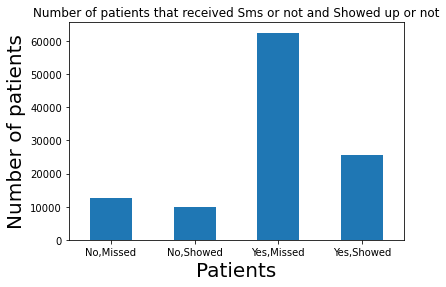

In [89]:
bars = ('No,Missed', 'No,Showed', 'Yes,Missed', 'Yes,Showed')
x_pos = np.arange(len(bars))

df.groupby('showed')['sms_received'].value_counts().plot(kind='bar');
plt.title('Number of patients that received Sms or not and Showed up or not');
plt.xlabel('Patients', size = 20)
plt.ylabel('Number of patients', size = 20)
plt.xticks(x_pos, bars, size = 10, rotation=0);

<a id='conclusions'></a>
## Conclusions

After investigation on the correlation between some of the characteristics of the patients and whether they missed or attended to the appointment. And here are some results of the analyses:

 - patients of average age that attended the appointments are 34 and who missed it are about 38 old.
 - There is no correlation between gender alone and missing the appointment.
 - Receiving an SMS did not affect attending or missing the appointment for patients.
 - weekdays has no large impact on patients as most of the attendence was in mid-weekdays as Tuesday and Wednesay.
 - Handicap (disabilities) is not the main reason for patients not to show up the appointments.

## Limitations

- There are some illogical data such as patients with age 0 which has to be more accurate as is it babies in months or more years 
- Need more features which can have more impact on patients to show up at the appointments or not like does patients has a severe issues or health problems
